# ESOL: Estimating Aqueous Solubility Directly from Molecular Structure

## Problem
This paper describes a simple method for estimating the aqueous solubility (ESOL − Estimated SOLubility) of a compound directly from its structure. The model was derived from a set of 2874 measured solubilities using linear regression against nine molecular properties. The most significant parameter was calculated, followed by molecular weight, proportion of heavy atoms in aromatic systems, and number of rotatable bonds. The model performed consistently well across three validation sets, predicting solubilities within a factor of 5−8 of their measured values, and was competitive with the well-established “General Solubility Equation” for medicinal/agrochemical sized molecules.


## Goals
- Reproduce the Delaney's paper using Python
- To learn more about Computational Drug Discovery

## References

[1] Delaney, John S. (2004). ESOL: estimating aqueous solubility directly from molecular structure. Journal of chemical information and computer sciences.

[2] Chanin Nantasenamat. How to Use Machine Learning for Drug Discovery. https://towardsdatascience.com/how-to-use-machine-learning-for-drug-discovery-1ccb5fdf81ad

[3] Deep Learning for the Life Sciences: Applying Deep Learning to Genomics, Microscopy, Drug Discovery, and More 1st Edition.

[4] Pat Walters. Predicting Aqueous Solubility - It's Harder Than It Looks. http://practicalcheminformatics.blogspot.com/2018/09/predicting-aqueous-solubility-its.html

In [1]:
# Load libraries
import numpy as np 
import pandas as pd
import researchpy as rp 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# Load dataset
data = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')
data.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


## Exploring Data 

In [3]:
# check shape of data 
data.shape

(1144, 5)

In [4]:
# dtypes 
data.dtypes

MolLogP               float64
MolWt                 float64
NumRotatableBonds     float64
AromaticProportion    float64
logS                  float64
dtype: object

In [5]:
# info 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MolLogP             1144 non-null   float64
 1   MolWt               1144 non-null   float64
 2   NumRotatableBonds   1144 non-null   float64
 3   AromaticProportion  1144 non-null   float64
 4   logS                1144 non-null   float64
dtypes: float64(5)
memory usage: 44.8 KB


In [6]:
# check missing data 
data.isnull().sum() 

MolLogP               0
MolWt                 0
NumRotatableBonds     0
AromaticProportion    0
logS                  0
dtype: int64

## Descriptive statistics

In [7]:
# summary statistics of numerical variables 
rp.summary_cont(data[['MolLogP', 'MolWt', 'NumRotatableBonds', 'AromaticProportion', 'logS']])

C:\Users\JHossain\anaconda3\lib\site-packages\researchpy\summary.py:60: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ix, df_col in group1.iteritems():


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,MolLogP,1144.0,2.4491,1.8660,0.0552,2.3409,2.5574
1,MolWt,1144.0,204.6317,102.6205,3.0340,198.6788,210.5846
2,NumRotatableBonds,1144.0,2.1740,2.6274,0.0777,2.0215,2.3264
3,AromaticProportion,1144.0,0.3649,0.3433,0.0102,0.3450,0.3848
4,logS,1144.0,-3.0580,2.0965,0.0620,-3.1796,-2.9364


## Correlations between Variables 

In [8]:
# correlation: Pearson’s by default 
data.corr(method='pearson')

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
MolLogP,1.000000,0.468097,0.205607,0.250977,-0.827959
MolWt,0.468097,1.000000,0.394219,0.098855,-0.637324
NumRotatableBonds,0.205607,0.394219,1.000000,-0.296737,-0.238508
AromaticProportion,0.250977,0.098855,-0.296737,1.000000,-0.268108
logS,-0.827959,-0.637324,-0.238508,-0.268108,1.000000


## Skewness 

In [9]:
# skew 
data.skew() 

MolLogP              -0.012982
MolWt                 0.890477
NumRotatableBonds     2.158178
AromaticProportion    0.226302
logS                 -0.484590
dtype: float64

## Data visualizations

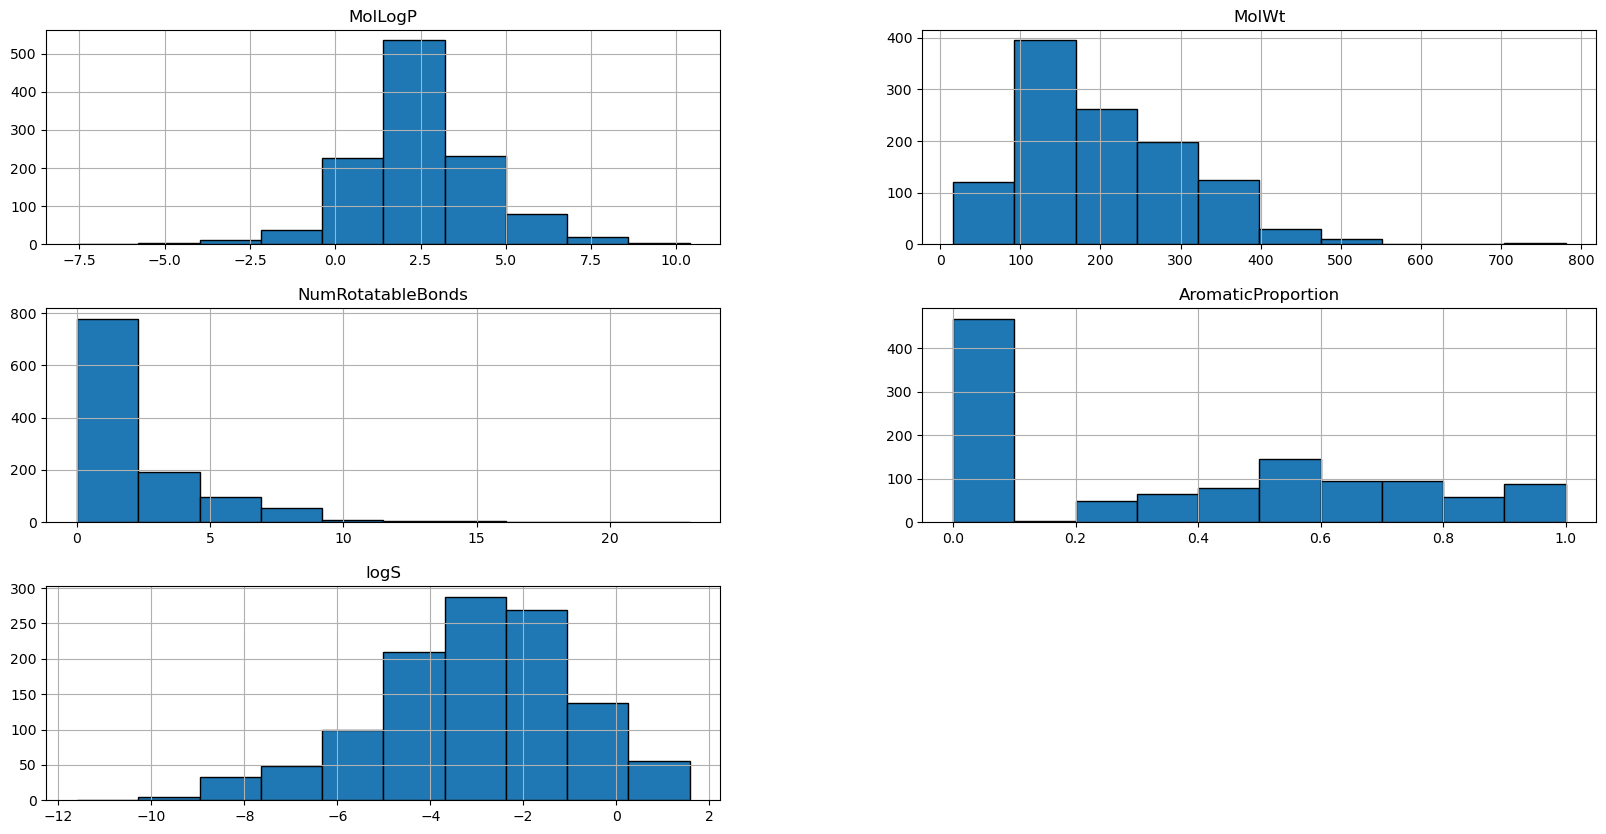

In [10]:
# Univariate distributions with histogram
data.hist(figsize=(20,10), edgecolor='black')
plt.show() 

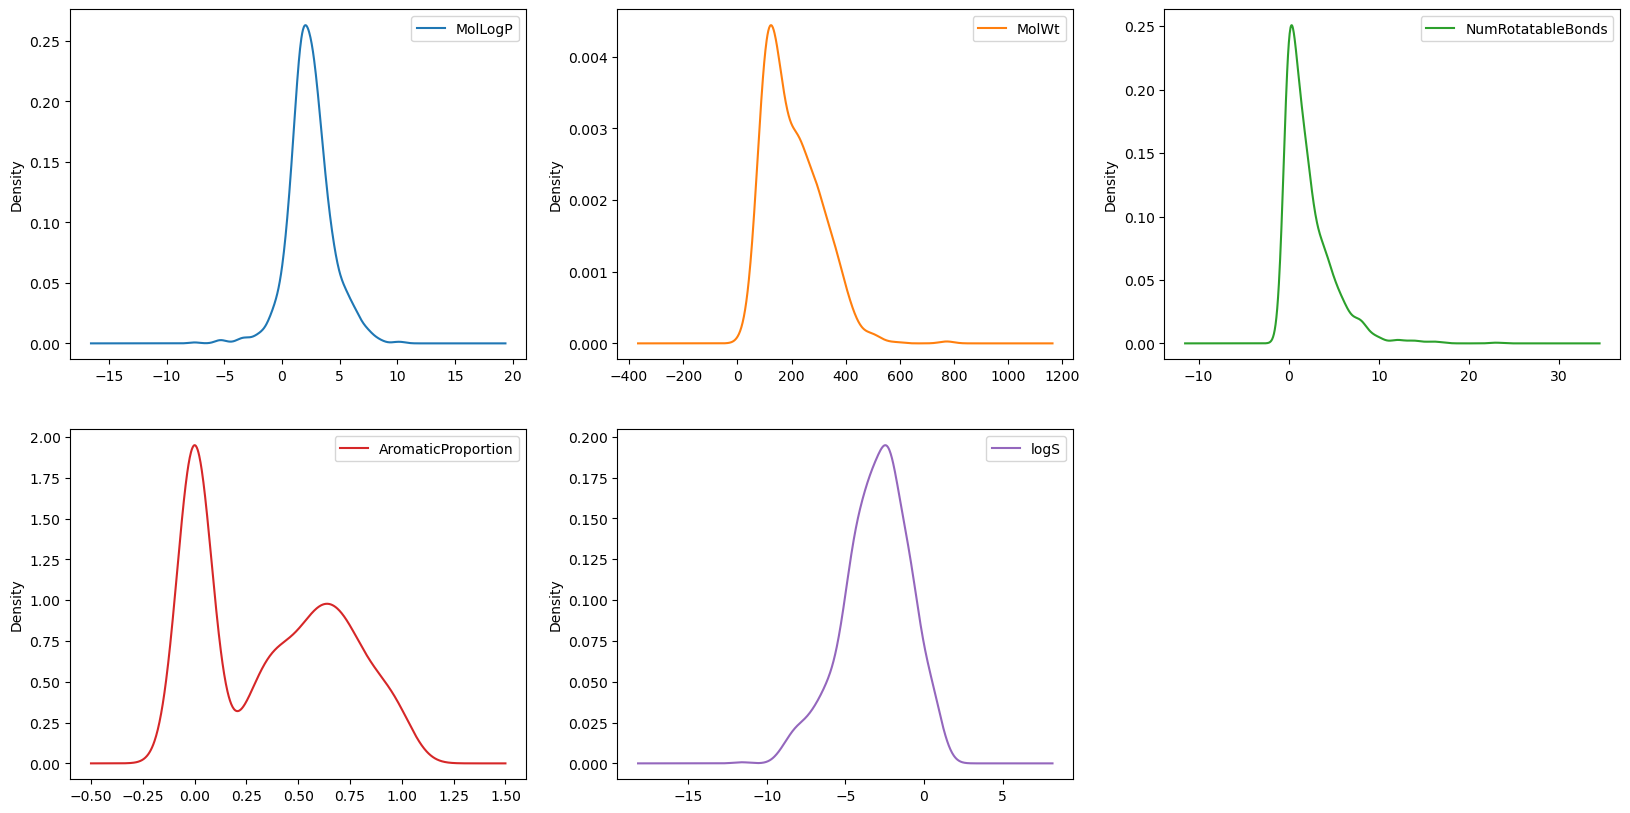

In [11]:
# Univariate distributions with density plot 
data.plot(kind='density', subplots=True, sharex=False, figsize=(20,10), layout=(2,3))
plt.show() 

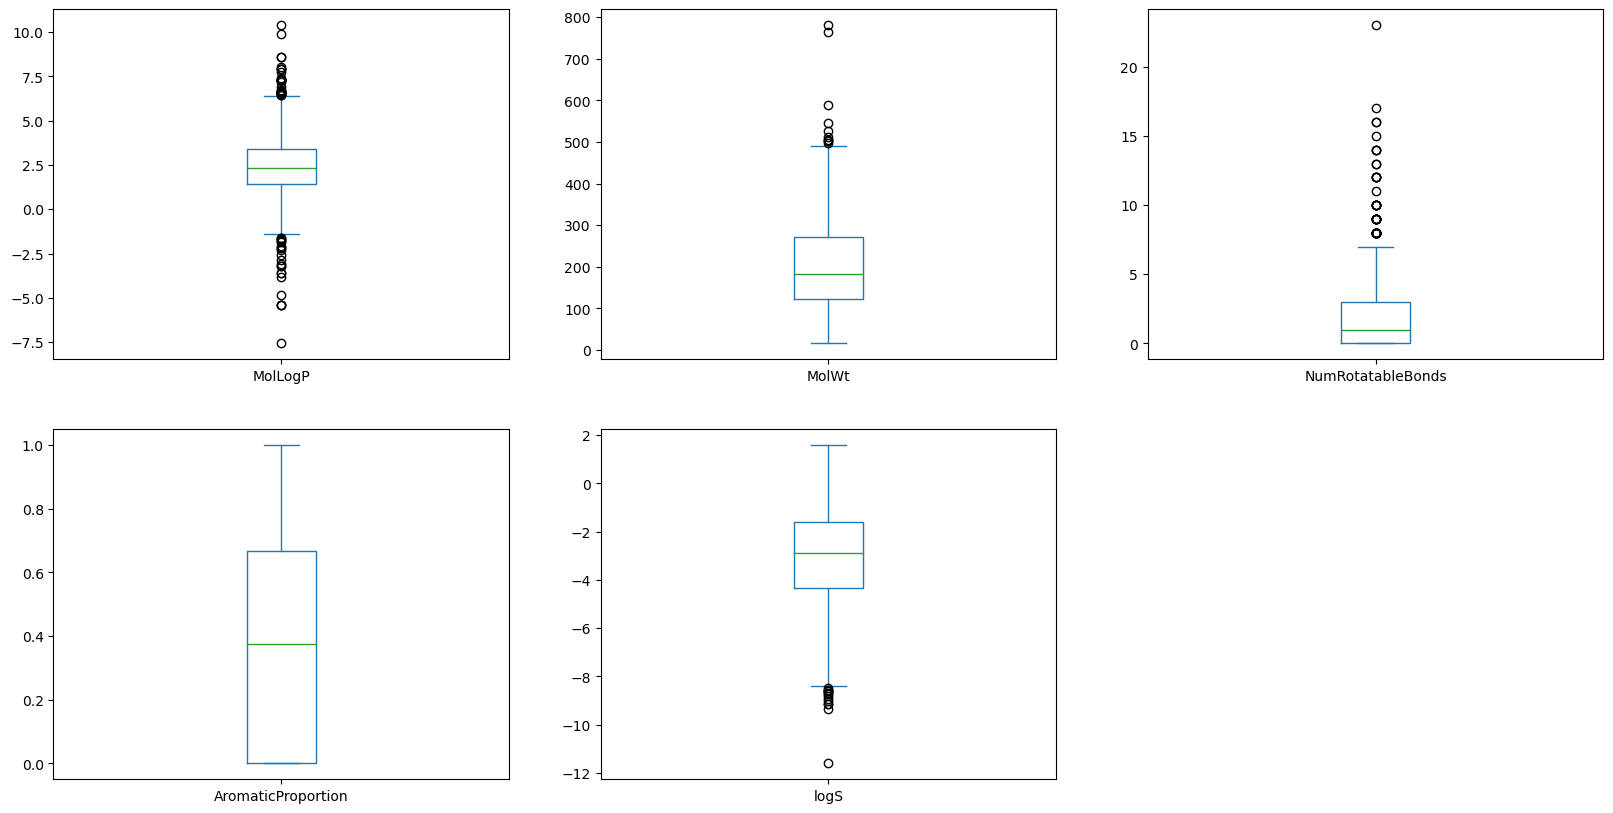

In [12]:
# Univariate distributions with box plots 
data.plot(kind='box', subplots=True, sharex=False, figsize=(20,10), layout=(2,3))
plt.show() 

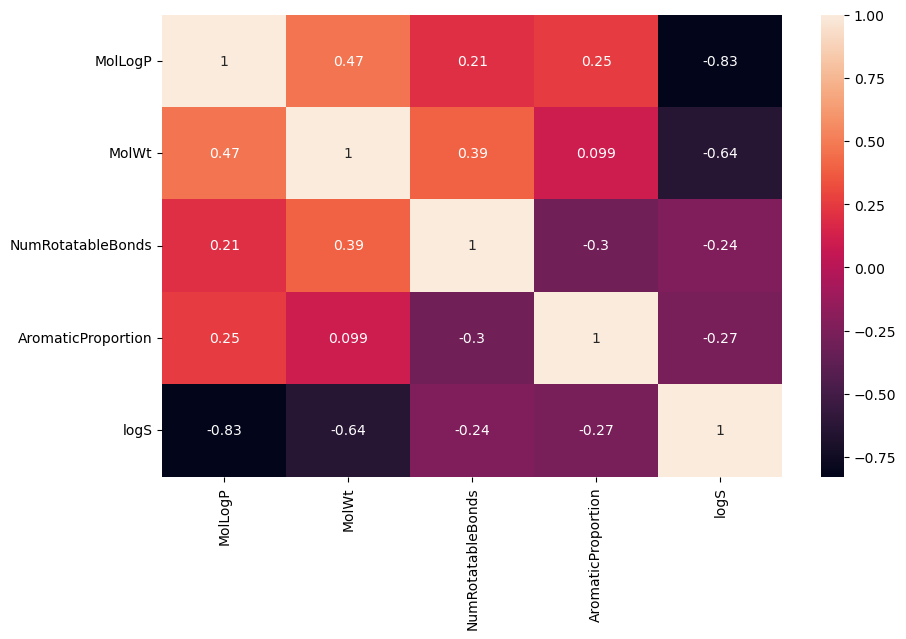

In [13]:
# Multivariate plots with correlations 
plt.figure(figsize=(10,6))
corr = data.corr() 
sns.heatmap(corr, annot=True)
plt.show()

## Setup 

In [14]:
# exmine first few rows of data 
data.head() 

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


In [15]:
# import pycaret classification and init setup
from pycaret.regression import *
setup(data, target = 'logS', train_size = .08, session_id = 123)

,Description,Value
0,Session id,123
1,Target,logS
2,Target type,Regression
3,Original data shape,"(1144, 5)"
4,Transformed data shape,"(1144, 5)"
5,Transformed train set shape,"(91, 5)"
6,Transformed test set shape,"(1053, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


## Compare Models 

In [16]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.5937,0.6494,0.7821,0.7390,0.2352,0.7942,0.2110
ada,AdaBoost Regressor,0.6485,0.7106,0.8192,0.7194,0.2357,0.9273,0.2070
rf,Random Forest Regressor,0.6380,0.7167,0.8258,0.7145,0.2340,0.7976,0.2080
gbr,Gradient Boosting Regressor,0.7261,0.9255,0.9299,0.6609,0.2792,0.7807,0.2070
dt,Decision Tree Regressor,0.7969,1.1005,1.0041,0.5997,0.2734,0.6608,0.2010
br,Bayesian Ridge,0.7751,1.0074,0.9821,0.5870,0.3088,0.7389,0.2040
ridge,Ridge Regression,0.7766,1.0127,0.9846,0.5803,0.3134,0.7068,0.1980
lar,Least Angle Regression,0.7777,1.0167,0.9865,0.5770,0.3149,0.6985,0.2040
lr,Linear Regression,0.7777,1.0167,0.9865,0.5770,0.3149,0.6985,0.6830
huber,Huber Regressor,0.7791,1.0403,0.9984,0.5625,0.3151,0.6069,0.2030


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

## Create Model 

In [17]:
# create model 
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.7295,0.8373,0.9150,0.8146,0.3288,0.6621
1,0.8157,1.2440,1.1153,0.7836,0.3303,4.9049
2,0.5375,0.5803,0.7618,0.6586,0.2491,0.1979
3,0.8610,1.2614,1.1231,0.3416,0.3522,0.4101
4,0.6183,0.5499,0.7415,0.4500,0.1991,0.2389
5,0.4943,0.3524,0.5936,0.8720,0.2104,0.5975
6,0.5046,0.4246,0.6516,0.9291,0.1707,0.3410
7,0.4515,0.4548,0.6744,0.8305,0.2036,0.1969
8,0.4390,0.2893,0.5378,0.9146,0.1561,0.2352


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [18]:
# print model parameters
print(et)

ExtraTreesRegressor(n_jobs=-1, random_state=123)


## Tune Model 

In [19]:
# tune hyperparameters of et
tuned_et = tune_model(et, n_iter = 50, optimize = "mae")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6717,0.8797,0.9379,0.8052,0.2155,0.5385
1,0.8837,1.4049,1.1853,0.7556,0.3791,7.2279
2,0.5826,0.5497,0.7414,0.6766,0.2238,0.1969
3,0.8595,1.2030,1.0968,0.3721,0.3471,0.4514
4,0.9602,1.2808,1.1317,-0.2811,0.3406,0.3575
5,0.6770,0.6198,0.7873,0.7748,0.2719,0.8553
6,0.7719,0.8677,0.9315,0.8552,0.2816,0.6681
7,0.5250,0.4639,0.6811,0.8272,0.2239,0.3013
8,0.7181,0.7877,0.8876,0.7675,0.2306,0.3511


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [20]:
# print tuned model
print(tuned_et)

ExtraTreesRegressor(n_jobs=-1, random_state=123)


In [21]:
# to access the tuner object you can set return_tuner = True
tuned_et, tuner = tune_model(et, return_tuner=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.9344,1.4378,1.1991,0.6816,0.2785,0.7455
1,1.0625,2.0448,1.4300,0.6442,0.4682,9.8673
2,0.5371,0.4696,0.6853,0.7237,0.1925,0.1777
3,0.8078,1.0310,1.0154,0.4619,0.3155,0.4663
4,0.7954,0.8386,0.9157,0.1612,0.2565,0.3240
5,0.7359,0.8366,0.9147,0.6960,0.2983,0.9740
6,1.0848,1.9093,1.3818,0.6814,0.3522,0.8395
7,0.6123,0.6466,0.8041,0.7591,0.2308,0.3274
8,0.8416,1.0428,1.0212,0.6922,0.2639,0.4224


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [22]:
tuned_et

ExtraTreesRegressor(n_jobs=-1, random_state=123)

In [23]:
tuner

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=FastMemory(location=C:\Users\JHossain\AppData\Local\Temp\joblib),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['MolLogP',
                                                                          'MolWt',
                                                                          'NumRotatableBonds',
                                                                          'AromaticProportion'],
                                                                 transformer=SimpleImputer())),
                                             ('categorical_imputer',
                                              TransformerWrappe...
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10],
                                        'actual_estimator__n_estimators': [10,
                                                                           20,
                                                                           30,
                                                                           40,
                                                                           50,
                                                                           60,
                                                                           70,
                                                                           80,
                                                                           90,
                                                                           100,
                                                                           110,
                                                                           120,
                                                                           130,
                                                                           140,
                                                                           150,
                                                                           160,
                                                               

## Analyze Model 

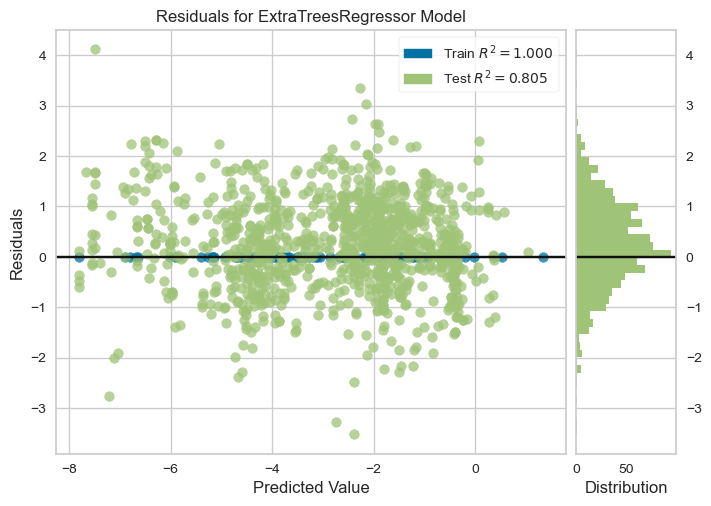

In [24]:
# residuals plot 
plot_model(et, plot = 'residuals')

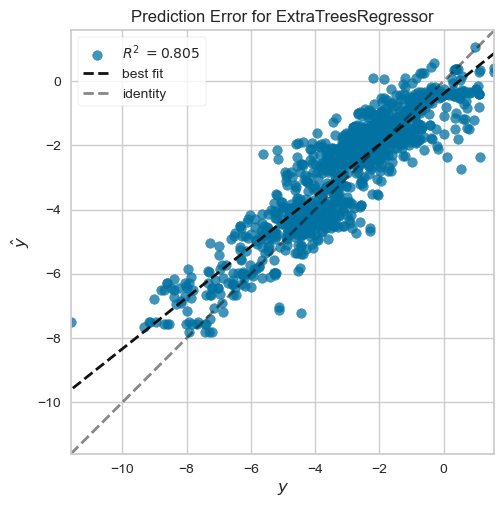

In [25]:
# predicting error plot 
plot_model(et, plot = 'error')

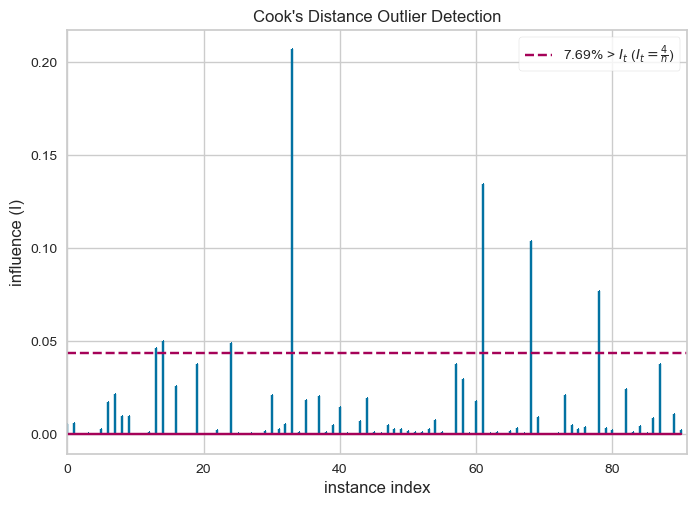

In [26]:
# cooks distance plot 
plot_model(et, plot = 'cooks')

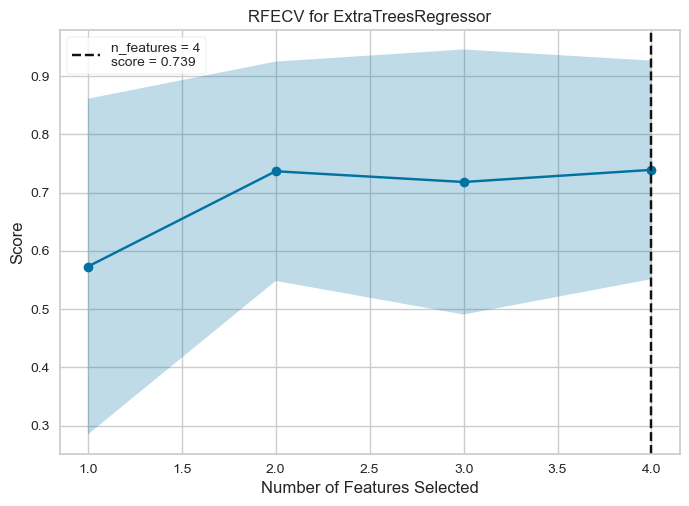

In [27]:
# recursive feature selection
plot_model(et, plot = 'rfe')

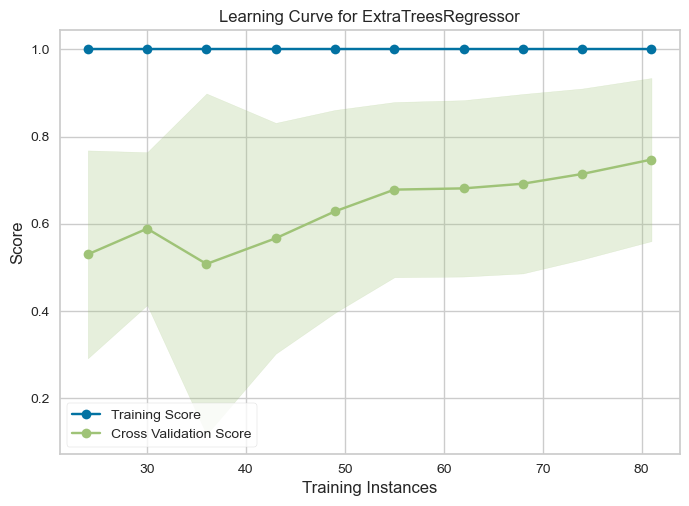

In [28]:
# learning curve 
plot_model(et, plot = 'learning')

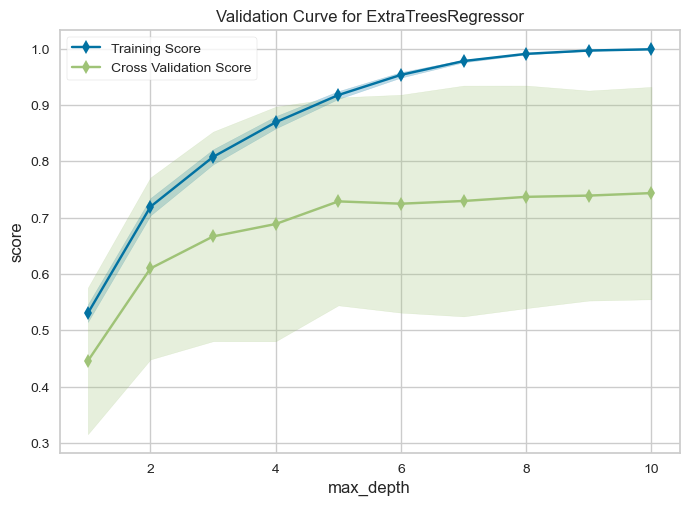

In [29]:
# validation curve 
plot_model(et, plot = 'vc')

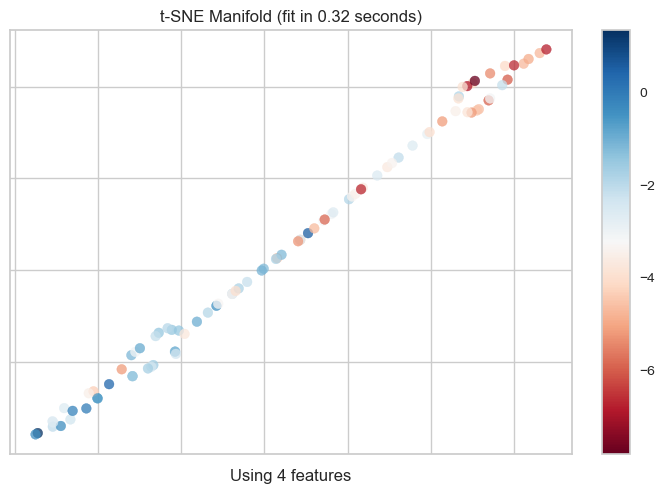

In [30]:
# manifold learning plot 
plot_model(et, plot = 'manifold')

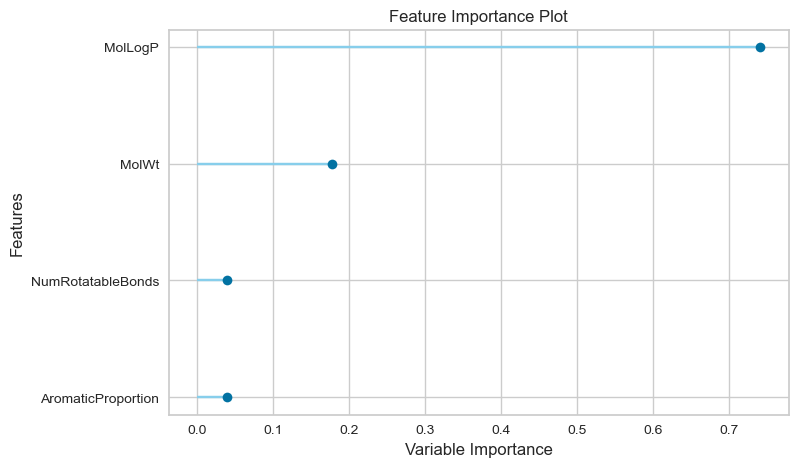

In [31]:
# plot feature importance
plot_model(best, plot = 'feature')

## Evaluate Model 

In [32]:
# evaluate model 
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Finalize Model 

In [33]:
# finalize a model
finalize_model(et)

Pipeline(memory=FastMemory(location=C:\Users\JHossain\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['MolLogP', 'MolWt',
                                             'NumRotatableBonds',
                                             'AromaticProportion'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('actual_estimator',
                 ExtraTreesRegressor(n_jobs=-1, random_state=123))])

## Prediction

In [34]:
# predict on test set
holdout_pred = predict_model(et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.7273,0.8718,0.9337,0.8051,0.2559,0.7491


In [35]:
# show predictions df
holdout_pred.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS,prediction_label
681,5.26898,349.429993,5.0,0.461538,-6.025,-5.71126
373,1.84570,360.450012,3.0,0.000000,-3.850,-2.06777
541,2.09160,128.214996,0.0,0.000000,-1.290,-1.72016
381,1.84560,227.337006,5.0,0.400000,-3.040,-2.31554
141,1.02480,88.150002,0.0,0.000000,-0.400,-0.48502


In [36]:
# copy data and drop Class variable
new_data = data.copy()
new_data.drop('logS', axis=1, inplace=True)
new_data.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.5954,167.850,0.0,0.0
1,2.3765,133.405,0.0,0.0
2,2.5938,167.850,1.0,0.0
3,2.0289,133.405,1.0,0.0
4,2.9189,187.375,1.0,0.0


In [37]:
# predict model on new_data
predictions = predict_model(et, data = new_data)
predictions.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,prediction_label
0,2.5954,167.850006,0.0,0.0,-1.7092
1,2.3765,133.404999,0.0,0.0,-1.9794
2,2.5938,167.850006,1.0,0.0,-1.7400
3,2.0289,133.404999,1.0,0.0,-1.4800
4,2.9189,187.375000,1.0,0.0,-3.7649


## Interpret Model 

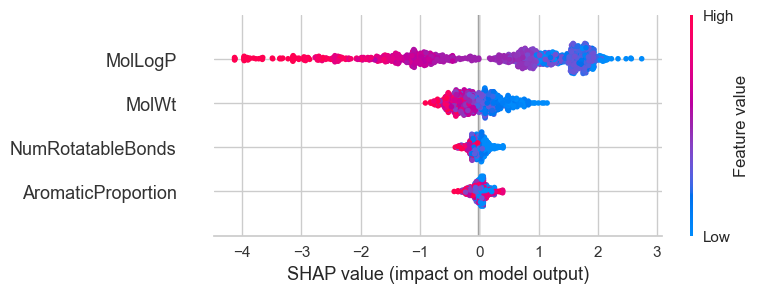

In [38]:
# interpret model 
interpret_model(et)

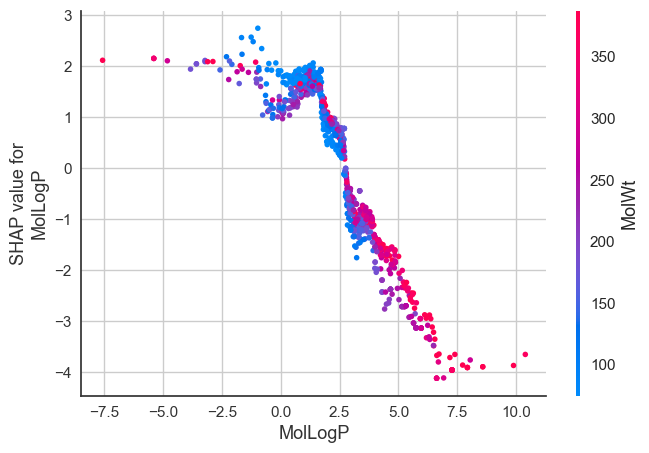

In [41]:
# correlation plot
interpret_model(et, plot = "correlation")

In [42]:
# reason plot
interpret_model(et, plot = "reason", observation = 10)

## Save Model 

In [45]:
# save pipeline
save_model(et, '../models/esol')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\JHossain\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['MolLogP', 'MolWt',
                                              'NumRotatableBonds',
                                              'AromaticProportion'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model',
                  ExtraTreesRegressor(n_jobs=-1, random_state=123))]),
 '../models/esol.pkl')

In [46]:
# load pipeline
loaded_best_pipeline = load_model('../models/esol')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\JHossain\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['MolLogP', 'MolWt',
                                             'NumRotatableBonds',
                                             'AromaticProportion'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model',
                 ExtraTreesRegressor(n_jobs=-1, random_state=123))])

In [47]:
# prediction
prediction_holdout = predict_model(et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.7273,0.8718,0.9337,0.8051,0.2559,0.7491


In [48]:
prediction_holdout.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS,prediction_label
681,5.26898,349.429993,5.0,0.461538,-6.025,-5.71126
373,1.84570,360.450012,3.0,0.000000,-3.850,-2.06777
541,2.09160,128.214996,0.0,0.000000,-1.290,-1.72016
381,1.84560,227.337006,5.0,0.400000,-3.040,-2.31554
141,1.02480,88.150002,0.0,0.000000,-0.400,-0.48502
